In [236]:
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [237]:
##Choose .csv file from computer
from google.colab import files
uploaded = files.upload()

Saving DS.csv to DS (1).csv


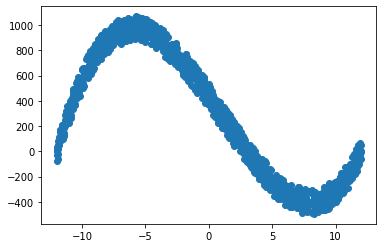

In [276]:
import csv
filename = "DS.csv"

xval = []
yval = []
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    for row in csvreader:
        xval.append(float(row[0]))
        yval.append(float(row[1]))
        
df = pd.read_csv('DS.csv')
plt.scatter(xval, yval)
plt.show()

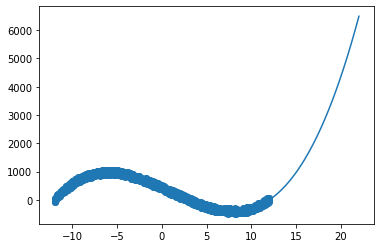

In [277]:
import numpy
mymodel = numpy.poly1d(numpy.polyfit(xval, yval, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(xval, yval)
plt.plot(myline, mymodel(myline))
plt.show()

In [278]:
xval[:10]

[-12.0,
 -11.975975975975976,
 -11.951951951951951,
 -11.927927927927929,
 -11.903903903903904,
 -11.87987987987988,
 -11.855855855855856,
 -11.831831831831831,
 -11.807807807807809,
 -11.783783783783784]

In [279]:
yval[:10]

[0.0,
 8.626153518721935,
 17.207372239810468,
 25.74373935659503,
 34.23533806240829,
 42.68225155057928,
 51.08456301443886,
 59.44235564731753,
 67.75571264254506,
 76.02471719345334]

In [280]:
df.corr(method ='pearson')

,-12.0,0.0
-12.0,1.000000,-0.805009
0.0,-0.805009,1.000000


In [281]:
df.corr(method ='kendall')

,-12.0,0.0
-12.0,1.000000,-0.587091
0.0,-0.587091,1.000000


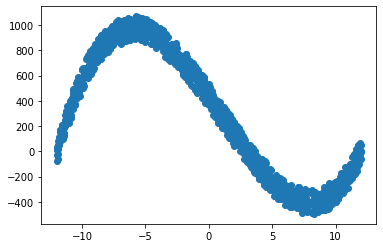

In [282]:
plt.scatter(df['-12.0'], df['0.0'])

In [283]:
data = pd.read_csv('DS.csv')
x = df['-12.0'].values
y = df['0.0'].values

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [285]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [286]:
y_train = y_train[x_train[:,0].argsort()]
x_train = x_train[x_train[:, 0].argsort()]

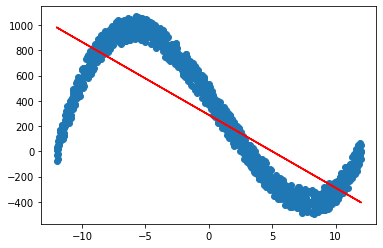

In [287]:
X = np.array(df['-12.0']).reshape(-1, 1)
y = df['0.0']
lin_reg = LinearRegression()
lin_reg.fit(X, y)

plt.scatter(X, y)
plt.plot(x, lin_reg.predict(X), color='red')
##The straight line does not acuurately fit the curve so we have to choose higher order equations


In [288]:
#plt.title('Linear Regression')
#plt.xlabel('-12.0')
#plt.ylabel('0.0')
#plt.scatter(x, y)
#plt.plot(x_train, poly_reg.predict(poly1), c='red', label='Polynomial regression line')
#plt.legend(loc="upper left")
#plt.show()


In [289]:
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

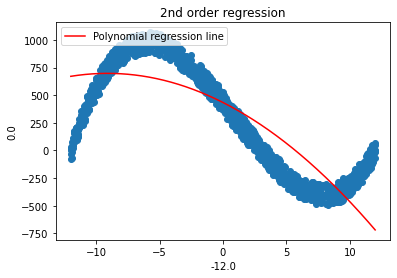

In [290]:
plt.title('2nd order regression')
plt.xlabel('-12.0')
plt.ylabel('0.0')
plt.scatter(x, y)
plt.plot(x_train, poly_reg.predict(x_poly2), c='red', label='Polynomial regression line')
plt.legend(loc="upper left")
plt.show()
##the curve is not fitting properly so we have to choose a higher order function

In [291]:
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

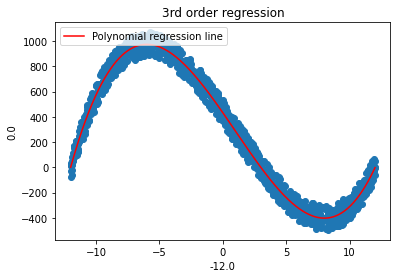

In [292]:
plt.title('3rd order regression')
plt.xlabel('-12.0')
plt.ylabel('0.0')
plt.scatter(x, y)
plt.plot(x_train, poly_reg.predict(x_poly3), c='red', label='Polynomial regression line')
plt.legend(loc="upper left")
plt.show()
##the curve fits exactly so the 3rd order regression works properly

In [293]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print('Coefficients of x are', lin_reg.coef_)
print('Intercept is', lin_reg.intercept_)

Coefficients of x are [[-57.37737878]]
Intercept is [279.64794469]


In [299]:
print("Decision Tree Regressor:")

Decision Tree Regressor:


In [300]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeRegressor
import matplotlib.image as pltimg

df = pandas.read_csv(filename, header=None)

print(df)

              0          1
0    -12.000000   0.000000
1    -11.975976   8.626154
2    -11.951952  17.207372
3    -11.927928  25.743739
4    -11.903904  34.235338
...         ...        ...
1995  11.903904   7.547093
1996  11.927928  -8.396527
1997  11.951952  66.697695
1998  11.975976 -64.170157
1999  12.000000  50.000000

[2000 rows x 2 columns]


In [301]:
x = [[i] for i in df[0]]
y = [i for i in df[1]]

print(x)
print(y)

[[-12.0], [-11.975975975975974], [-11.951951951951951], [-11.927927927927929], [-11.903903903903904], [-11.87987987987988], [-11.855855855855856], [-11.831831831831831], [-11.807807807807805], [-11.783783783783786], [-11.75975975975976], [-11.735735735735734], [-11.711711711711711], [-11.687687687687689], [-11.663663663663664], [-11.63963963963964], [-11.615615615615615], [-11.591591591591591], [-11.567567567567568], [-11.543543543543544], [-11.51951951951952], [-11.495495495495494], [-11.471471471471471], [-11.447447447447448], [-11.423423423423426], [-11.3993993993994], [-11.375375375375375], [-11.351351351351349], [-11.327327327327328], [-11.303303303303304], [-11.27927927927928], [-11.255255255255255], [-11.231231231231229], [-11.207207207207208], [-11.183183183183184], [-11.15915915915916], [-11.135135135135135], [-11.111111111111109], [-11.087087087087085], [-11.063063063063064], [-11.03903903903904], [-11.015015015015015], [-10.990990990990989], [-10.966966966966968], [-10.94294

In [302]:
rng = numpy.random.RandomState(1)
X = numpy.sort(5 * rng.rand(80, 1), axis=0)
y = numpy.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [303]:
X = df[0].values
y = df[1].values

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [305]:
treeRegr = DecisionTreeRegressor(max_depth=10)
treeRegr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [306]:
y_pred = treeRegr.predict(X_test.reshape(-1,1))

In [307]:
r2 = r2_score(y_test, y_pred)
print("r square value for Decision Tree Regression:",r2)

r square value for Decision Tree Regression: 0.9878459864059451


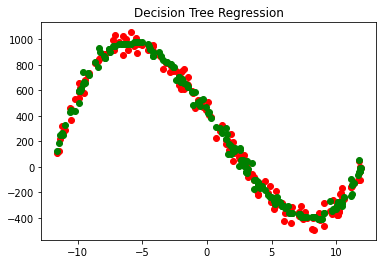

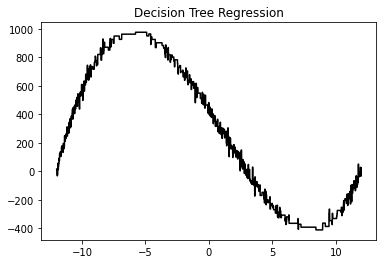

In [308]:
X_grid = numpy.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'r')
plt.scatter(X_test, y_pred, color = 'g')
plt.title('Decision Tree Regression')
plt.show()

plt.plot(X_grid, treeRegr.predict(X_grid), color = 'k')
plt.title('Decision Tree Regression')
plt.show()

In [309]:
treeRegr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)).score(X_train.reshape(-1,1), y_train.reshape(-1,1))

0.9957359612862393

In [311]:
print("Random Forest Regression")

Random Forest Regression


In [312]:
import pandas
import numpy
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg
filename="DS.csv"
df = pandas.read_csv(filename, header=None)

print(df)

              0          1
0    -12.000000   0.000000
1    -11.975976   8.626154
2    -11.951952  17.207372
3    -11.927928  25.743739
4    -11.903904  34.235338
...         ...        ...
1995  11.903904   7.547093
1996  11.927928  -8.396527
1997  11.951952  66.697695
1998  11.975976 -64.170157
1999  12.000000  50.000000

[2000 rows x 2 columns]


In [313]:
x = [[i] for i in df[0]]
y = [i for i in df[1]]

In [314]:
print(x)
print(y)

[[-12.0], [-11.975975975975974], [-11.951951951951951], [-11.927927927927929], [-11.903903903903904], [-11.87987987987988], [-11.855855855855856], [-11.831831831831831], [-11.807807807807805], [-11.783783783783786], [-11.75975975975976], [-11.735735735735734], [-11.711711711711711], [-11.687687687687689], [-11.663663663663664], [-11.63963963963964], [-11.615615615615615], [-11.591591591591591], [-11.567567567567568], [-11.543543543543544], [-11.51951951951952], [-11.495495495495494], [-11.471471471471471], [-11.447447447447448], [-11.423423423423426], [-11.3993993993994], [-11.375375375375375], [-11.351351351351349], [-11.327327327327328], [-11.303303303303304], [-11.27927927927928], [-11.255255255255255], [-11.231231231231229], [-11.207207207207208], [-11.183183183183184], [-11.15915915915916], [-11.135135135135135], [-11.111111111111109], [-11.087087087087085], [-11.063063063063064], [-11.03903903903904], [-11.015015015015015], [-10.990990990990989], [-10.966966966966968], [-10.94294

In [315]:
rng = numpy.random.RandomState(1)
X = numpy.sort(5 * rng.rand(80, 1), axis=0)
y = numpy.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
X = df[0].values
y = df[1].values

print(X)
print(y)

[-12.         -11.97597598 -11.95195195 ...  11.95195195  11.97597598
  12.        ]
[  0.           8.62615352  17.20737224 ...  66.69769499 -64.17015698
  50.        ]


In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [317]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [318]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test.reshape(-1,1))
r2 = r2_score(y_test, y_pred)
print("r square value for Random Forest Regression:",r2)

r square value for Random Forest Regression: 0.9903447547938274


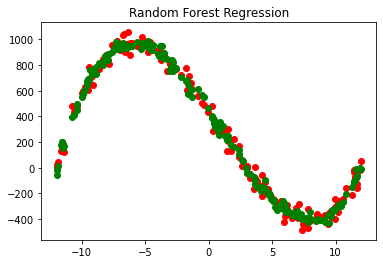

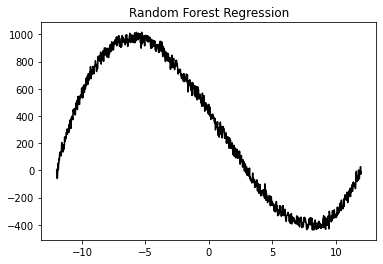

In [319]:
X_grid = numpy.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'r')
plt.scatter(X_test, y_pred, color = 'g')
plt.title('Random Forest Regression')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'k')
plt.title('Random Forest Regression')
plt.show()

In [320]:
print("SVR regression")

SVR regression


In [321]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [323]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [324]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [325]:
y_pred

array([ 294.40201242, -398.3132268 , -408.2636442 ,  264.45552228,
        860.58459857,  647.15568374, -308.10761263,  356.42872151,
        221.29540366, -413.75241027,  834.1044702 , -243.40514638,
          7.45118539,  948.22655998, -237.70588796,  -89.16199226,
        134.64258066, -406.95188252,  531.71983418,  976.08794613,
        905.40148274,   87.28294502,  380.07730982,  981.71699327,
       -378.49921271, -235.11709159,  354.34692446,  525.00866359,
       -119.1772746 ,  257.97108249,  963.37032208, -343.44935673,
        984.09516509,  141.4409438 , -295.58700573,  959.64622598,
        960.75188631,  -91.60985584,  616.26252058,  748.62870687,
        390.17763643,  917.05965373,  550.85276846,  856.58137822,
        775.19569614,  983.45721128,  514.18044674, -252.95788159,
       -360.96805455,  184.46151288,  469.99694539,  -69.75535042,
        693.25514641,  936.18314354,  322.47849178, -282.75604572,
        619.3109942 ,   40.45872207,  922.08466491, -107.32631

In [326]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [328]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [329]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [330]:
r2 = r2_score(y_test, y_pred)
print("r square value for SVR:",r2)

r square value for SVR: 0.9917967296560415


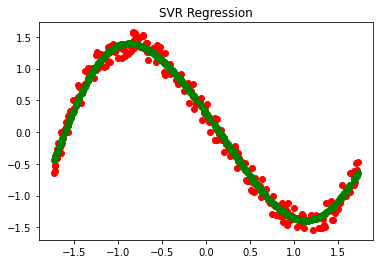

In [186]:
X_grid = numpy.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.show()

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\msram\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.
